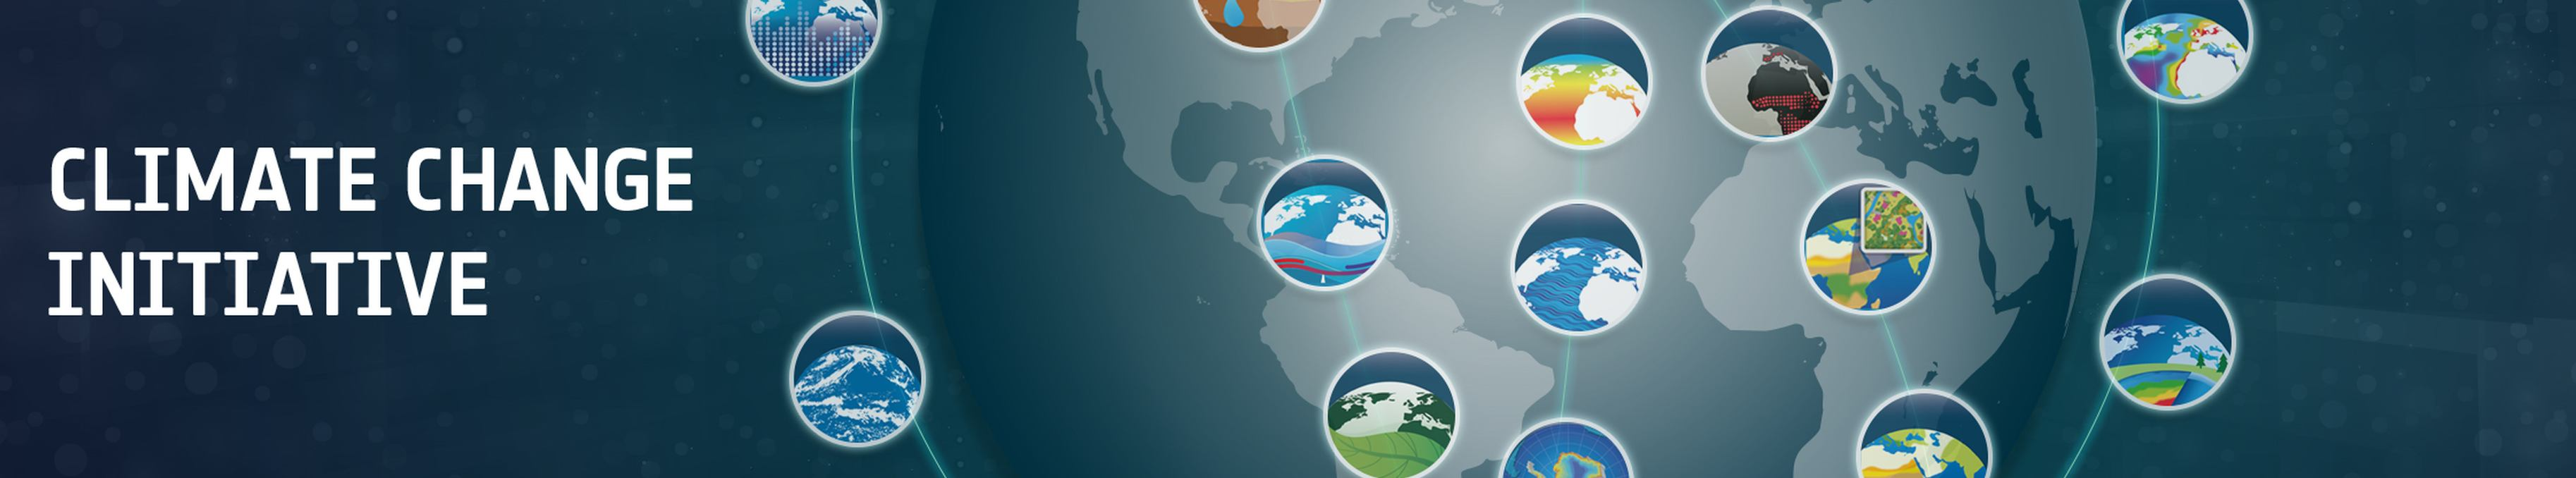

# Getting Started with Cloud CCI Data

### 1. Import Necessary Packages

In this section, we import the required Python packages to work with ESA Climate Change Initiative (CCI) data. Most notably, we use the [ESA Climate Toolbox](https://esa-climate-toolbox.readthedocs.io/en/latest/) which simplifies access, manipulation, and visualization of CCI datasets in Python.

These packages allow us to:
- Access satellite-based climate data records from ESA.
- Handle geospatial and temporal dimensions efficiently.
- Visualize data with intuitive plotting tools.

📚 For a broader introduction to the toolbox and how to install it, visit:  
🔗 [ESA CCI Climate Toolbox Quick Start](https://esa-climate-toolbox.readthedocs.io/en/latest/quick_start.html#jupyter-notebooks)  
🔗 [ESA Climate Data Toolbox Website](https://climate.esa.int/en/data/toolbox/)

In [1]:
from xcube.core.store import new_data_store
from esa_climate_toolbox.core import get_op
from esa_climate_toolbox.core import list_ecv_datasets
from esa_climate_toolbox.core import get_store
from esa_climate_toolbox.core import list_datasets
from esa_climate_toolbox.ops import plot
import xarray as xr
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") # Suppressing warnings to keep notebook output clean
%matplotlib inline

### Step 2: Connect to the ESA CCI Data Store

The ESA Climate Toolbox provides direct access to the **ESA Climate Data Store**, which hosts harmonized satellite-based climate data records produced under the **ESA Climate Change Initiative (CCI)**.

In this step, we establish a connection to the data store so we can browse and open datasets. This connection allows us to access data **without having to download files manually** — a convenient way to explore and analyze large geospatial datasets in cloud-friendly formats such as **Zarr** or **Kerchunk**.

The data store includes a wide range of essential climate variables (ECVs), such as aerosols, land surface temperature, sea level, and soil moisture.

📘 Learn more about available datasets:  
🔗 [ESA Climate Data Toolbox – Quick Start Guide](https://esa-climate-toolbox.readthedocs.io/en/latest/quick_start.html#data-access)

In [2]:
cci_store = new_data_store("esa-cci")
# List all available data sets of an ECV
list_ecv_datasets("Cloud")

[('esacci.CLOUD.mon.L3C.CLD_PRODUCTS.MODIS.Aqua.MODIS_AQUA.2-0.r1', 'esa-cci'),
 ('esacci.CLOUD.mon.L3C.CLD_PRODUCTS.MODIS.Terra.MODIS_TERRA.2-0.r1',
  'esa-cci'),
 ('esacci.CLOUD.mon.L3C.CLD_PRODUCTS.multi-sensor.multi-platform.ATSR2-AATSR.3-0.r1',
  'esa-cci'),
 ('esacci.CLOUD.mon.L3C.CLD_PRODUCTS.multi-sensor.multi-platform.AVHRR-AM.3-0.r1',
  'esa-cci'),
 ('esacci.CLOUD.mon.L3C.CLD_PRODUCTS.multi-sensor.multi-platform.AVHRR-PM.3-0.r1',
  'esa-cci'),
 ('esacci.CLOUD.mon.L3C.CLD_PRODUCTS.multi-sensor.multi-platform.MERIS-AATSR.2-0.r1',
  'esa-cci'),
 ('ESACCI-L3C_CLOUD-CLD_PRODUCTS-MODIS_AQUA-200208-201412-fv2.0_kr1.0',
  'esa-cci-kc'),
 ('ESACCI-L3C_CLOUD-CLD_PRODUCTS-ATSR2_AATSR-199506-201204-fv3.0-kr1.1',
  'esa-cci-kc'),
 ('ESACCI-L3C_CLOUD-CLD_PRODUCTS-AVHRR_AM-199109-201612-fv3.0-kr1.1',
  'esa-cci-kc'),
 ('ESACCI-L3C_CLOUD-CLD_PRODUCTS-AVHRR_PM-198201-201612-fv3.0-kr1.1',
  'esa-cci-kc'),
 ('ESACCI-L3C_CLOUD-CLD_PRODUCTS-MERIS-AATSR_ENVISAT-200301-201112_fv2.0_kr1.0',
  'esa-c

### Step 3: Define the Dataset ID  
To work with a specific ESA CCI dataset, we need to specify its **dataset ID**. This unique identifier tells the toolbox which variable and product we want to access.

In this example, we are using a dataset from the **Cloud CCI project** that provides monthly Level 3 cloud property products, derived from multiple satellite sensors. These products include key cloud variables such as **cloud fraction (cfc)**, which is important for understanding cloud coverage, its variability, and its impact on Earth’s radiation budget and climate.

We will use the following dataset ID:

In [3]:
data_id = 'esacci.CLOUD.mon.L3C.CLD_PRODUCTS.multi-sensor.multi-platform.AVHRR-PM.3-0.r1'

This product provides monthly cloud properties on a regular latitude–longitude grid at a resolution of 0.5°.
📘 A full list of dataset IDs can be retrieved from the store or found in the [ESA CCI Climate Toolbox documentation](https://esa-climate-toolbox.readthedocs.io/en/latest/quick_start.html#accessing-data).

### Step 4: Describe Dataset (Check Available Variables and Metadata)

Before loading the full dataset, it’s helpful to **inspect the metadata** to understand its structure. This includes:

- Available variables (e.g., cfc, uncertainty estimates)
- Temporal and spatial coverage
- Data format and structure

This step ensures we know what the dataset contains and how to work with it. It also helps confirm that the variable we want to plot or analyze is actually included.

🛠️ Tip: You can use the description to verify variable names, dimensions (e.g., `lat`, `lon`, `time`), and time coverage.

📘 More on dataset structure:  
🔗 [ESA Climate Toolbox – Data Access](https://esa-climate-toolbox.readthedocs.io/en/latest/quick_start.html#accessing-data)

In [4]:
cci_store.describe_data(data_id)

### Step 5: Check Open Parameters for the Dataset

Before opening the dataset, we can inspect which parameters are supported by the **Zarr opener** (e.g., `time_range`, `bbox`, `variable_names`). This step helps ensure that we pass valid arguments when loading data and avoid errors.

The command below lists all expected input parameters and their allowed values for the selected dataset.

In [5]:
cci_store.get_open_data_params_schema(data_id=data_id, opener_id='dataset:zarr:cciodp')

### Step 6: Define Region, Time Range, and Variables of Interest

Before opening the dataset, we define a few key parameters:

- **Time range**: the date(s) we want to load
- **Variables**: which data variable(s) to retrieve
- *(Optional)* **Bounding box**: spatial region of interest — here we skip it to load the global dataset

In [6]:
variables = ['cfc']  # Variable to retrieve
start_date = '2016-06-21'    # Start and end date (same for a single timestep)
end_date = '2016-06-21'
# bbox = (-10.0, 35.0, 30.0, 60.0)  # Optional: restrict to a region like Europe

### Step 7: Open the Dataset

Now we open the dataset using the selected parameters.  
The ESA Climate Toolbox will download only the necessary data (e.g., variable and time range).
You can always adjust the time range or variables to explore different slices of the dataset.

In [7]:
cloud_ds = cci_store.open_data(
    data_id=data_id,
    variable_names=variables,
    time_range=[start_date, end_date]
    # bbox=bbox  # Uncomment if regional selection is needed
)

### Step 8: Display Dataset Structure

We print a summary of the opened dataset to inspect its structure, dimensions, variables, and metadata.  
This helps verify that the data was loaded correctly and shows what is available for analysis and visualization.
This step is useful to understand what the dataset contains before working with it further.

In [11]:
print("\nOpened Dataset:\n", cloud_ds)


Opened Dataset:
 <xarray.Dataset> Size: 2MB
Dimensions:                       (time: 1, lat: 360, lon: 720,
                                   hist1d_cer_bin_border: 12,
                                   hist1d_cer_bin_centre: 11,
                                   hist1d_cla_vis006_bin_border: 14,
                                   hist1d_cla_vis006_bin_centre: 13,
                                   hist1d_cla_vis008_bin_border: 14,
                                   ...
                                   hist1d_cwp_bin_centre: 14,
                                   hist2d_cot_bin_border: 14,
                                   hist2d_cot_bin_centre: 13,
                                   hist2d_ctp_bin_border: 16,
                                   hist2d_ctp_bin_centre: 15, hist_phase: 2,
                                   bnds: 2)
Coordinates: (12/23)
  * hist1d_cer_bin_border         (hist1d_cer_bin_border) float32 48B 0.0 ......
  * hist1d_cer_bin_centre         (hist1d_cer_bin_

### Step 9: Visualize Results

We now create a simple map plot of the selected variable.  
This allows us to explore the spatial patterns of the data — in this case, the Cloud Fraction (CFC) for the selected day.
For more interactive and advanced visualizations, check out the [ESA Climate Toolbox](https://climate.esa.int/en/data/toolbox/) or the [Toolbox documentation](https://esa-climate-toolbox.readthedocs.io/en/latest/quick_start.html#jupyter-notebooks).

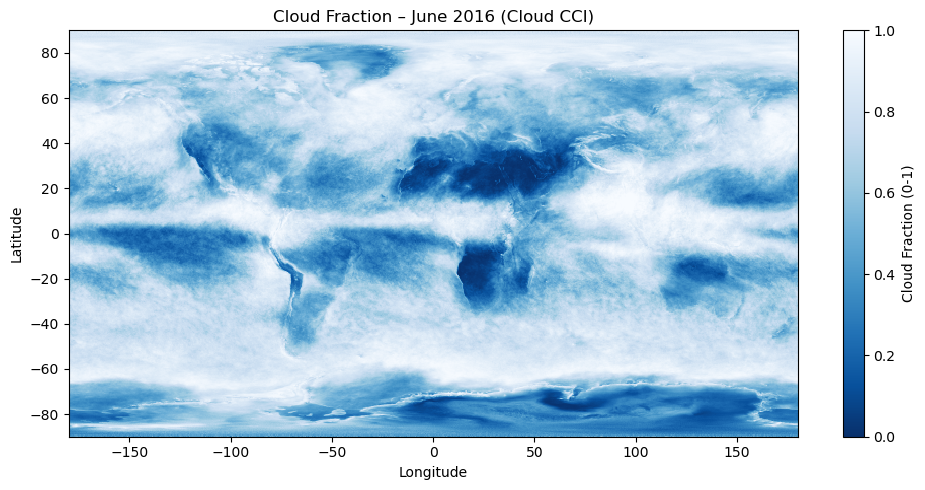

In [14]:
import matplotlib.pyplot as plt

# Select the cloud fraction data at the available time (e.g. first and only time slice)
cfc = cloud_ds["cfc"].isel(time=0)
time_str = cloud_ds['time'].isel(time=0).dt.strftime('%B %Y').item()

# Plot
plt.figure(figsize=(10, 5))
cfc.plot(
    cmap="Blues_r",  # reverse blues
    cbar_kwargs={"label": "Cloud Fraction (0-1)"}
)
plt.title("Cloud Fraction – " + time_str + " (Cloud CCI)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()